# Import the essential libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
custom={
    'xtick.bottom': True,
    'ytick.left': True,
    'grid.color': 'lightgrey',
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': 'gray'
}
sns.set_theme(style='darkgrid',rc=custom,palette='tab10')

# Define the bandit algorithm

A function to run the multi armed bandit logic taking in no: of arms, steps and the epsilon value as parameters.

In [10]:
def bandit_algorithm(num_arms, num_steps, epsilon):
    """
    Executes the multi-armed bandit algorithm with epsilon-greedy strategy.

    Parameters:
        num_arms (int): Number of arms or actions available to the agent.
        num_steps (int): Number of steps or iterations the algorithm will run for.
        epsilon (float): The probability of choosing a random action for exploration.

    Returns:
        reward (numpy.ndarray): Array containing cumulative rewards obtained over num_steps.
    """
    q_values = np.random.normal(0, 1, num_arms)  # True action values for each arm
    rewards = np.zeros(num_steps)  # Store cumulative rewards over time
    action_counts = np.zeros(num_arms)  # Store how many times each action is chosen

    for step in range(num_steps):
        # Epsilon-greedy strategy
        if np.random.rand() < epsilon:
            action = np.random.randint(num_arms)  # Explore: choose a random action
        else:
            action = np.argmax(q_values)  # Exploit: choose the action with the highest estimated value

        # Generate reward with noise
        reward = np.random.normal(q_values[action], 1)

        # Update action values and counts
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]

        # Update cumulative rewards
        rewards[step] = reward
        
    return rewards

# Plot the differences

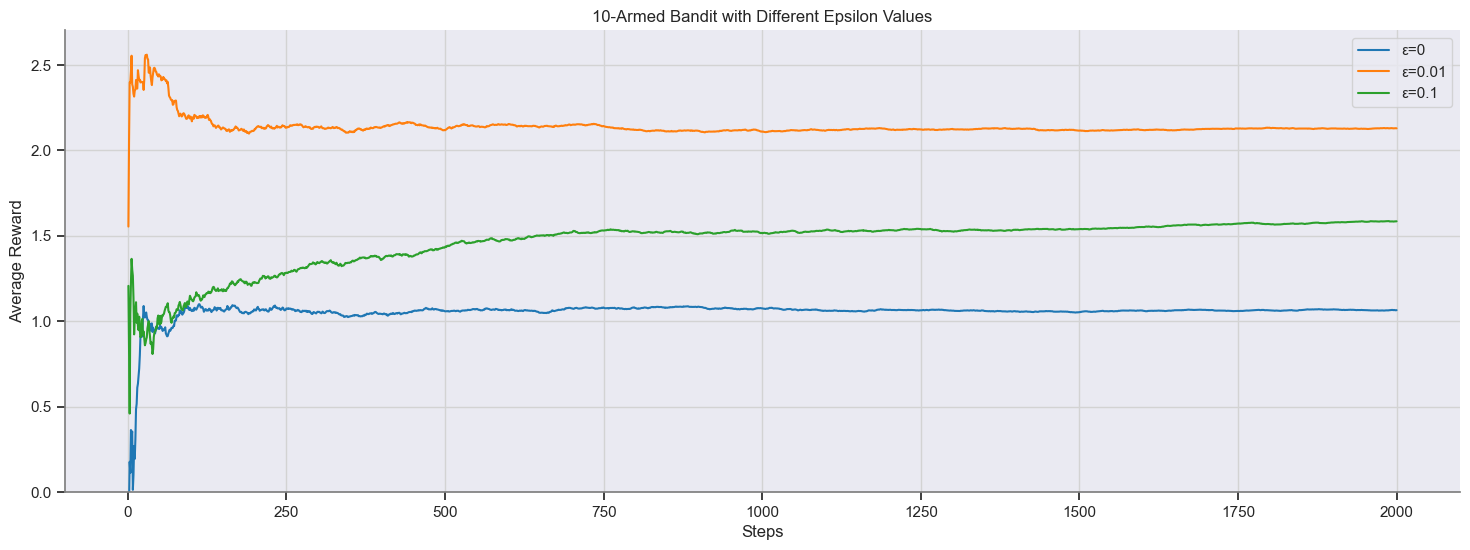

In [12]:
def plot_bandit_performance(num_arms, num_steps, epsilon):
    """
    Plots the performance of the bandit algorithm with different epsilon values.

    Parameters:
        num_arms (int): Number of arms in the bandit problem.
        num_steps (int): Number of steps or iterations the algorithm will run.
        epsilon (list of float): List of epsilon values to test in the epsilon-greedy strategy.

    Returns:
        None
    """
    plt.figure(figsize=(18, 6))
    for count in epsilon:
        # Run the bandit algorithm
        results = bandit_algorithm(num_arms, num_steps, count)
        # Plot average rewards over time
        sns.lineplot(x=np.arange(1, num_steps + 1), y=np.cumsum(results) / np.arange(1, num_steps + 1), label=f'ε={count}')
        
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.ylim(bottom=0)
    plt.title(f'{num_arms}-Armed Bandit with Different Epsilon Values')
    plt.legend()
    plt.show()

# Value Initialisation
num_arms = 10
num_steps = 2000
epsilon = [0, 0.01, 0.1]
# Plotting the algorithm results
plot_bandit_performance(num_arms, num_steps, epsilon)
